In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import torch
import random
import torch.nn as nn
import torch.optim as optim
warnings.filterwarnings('ignore')

In [6]:
data_path = './dataset'
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)
cross = 20

cuda:1


Begin to process person huangsiye_20210529_1.
Acc of train set: 0.90080
Acc of test set: 0.90105
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91644
Acc of test set: 0.91239
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87530
Acc of test set: 0.86781
Begin to process person liangjie_20210424_2.
Acc of train set: 0.73948
Acc of test set: 0.75798
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75402
Acc of test set: 0.76703
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81847
Acc of test set: 0.80914
Begin to process person tana_20210425_1.
Acc of train set: 0.92440
Acc of test set: 0.92845
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77609
Acc of test set: 0.77010
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83909
Acc of test set: 0.83941
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80989
Acc of test set: 0.80932
Begin to process person zhengwen

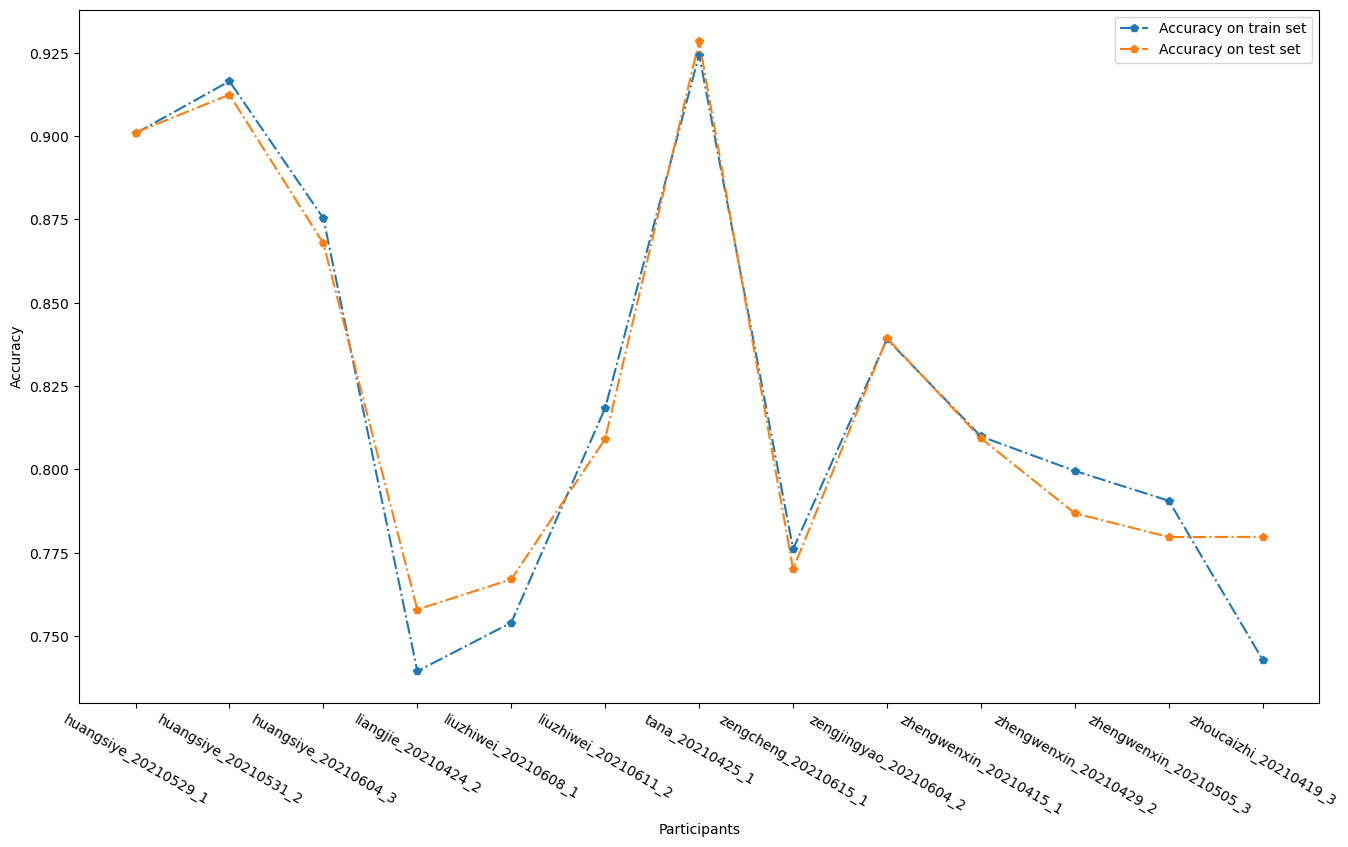

In [7]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_SVM = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = svm.SVC(C=1,kernel='rbf')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_SVM.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_SVM, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89509
Acc of test set: 0.89673
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91647
Acc of test set: 0.91380
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87205
Acc of test set: 0.87541
Begin to process person liangjie_20210424_2.
Acc of train set: 0.72836
Acc of test set: 0.75114
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.76117
Acc of test set: 0.74472
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81759
Acc of test set: 0.81316
Begin to process person tana_20210425_1.
Acc of train set: 0.92644
Acc of test set: 0.92299
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.76616
Acc of test set: 0.77903
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.84005
Acc of test set: 0.82315
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80620
Acc of test set: 0.80986
Begin to process person zhengwen

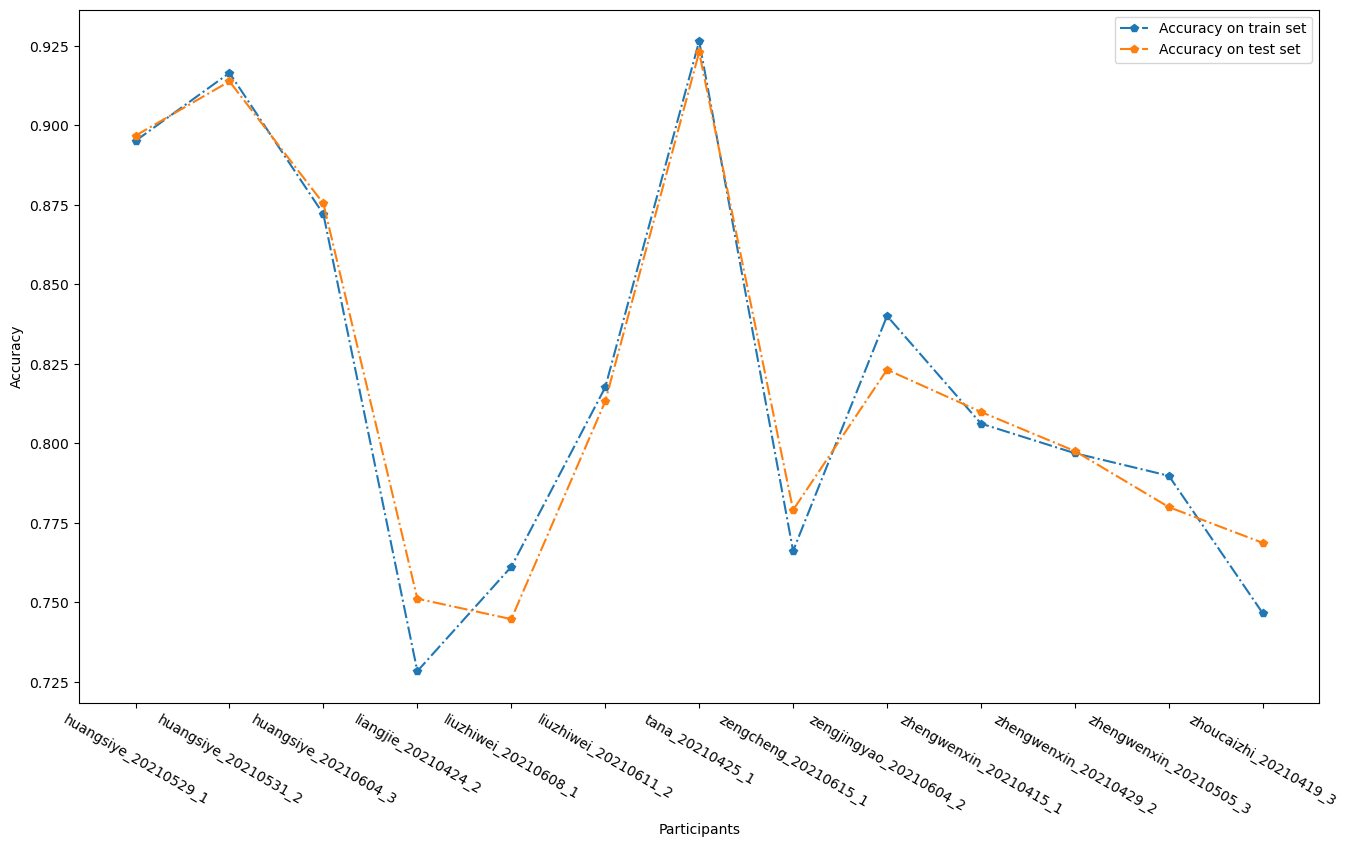

In [8]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_LR = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_LR.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.93435
Acc of test set: 0.87939
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.95260
Acc of test set: 0.86226
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87637
Acc of test set: 0.87278
Begin to process person liangjie_20210424_2.
Acc of train set: 0.76376
Acc of test set: 0.73254
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.81575
Acc of test set: 0.72240
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.86886
Acc of test set: 0.77682
Begin to process person tana_20210425_1.
Acc of train set: 0.96833
Acc of test set: 0.89327
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.80349
Acc of test set: 0.75833
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.85155
Acc of test set: 0.81589
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.83040
Acc of test set: 0.77885
Begin to process person zhengwen

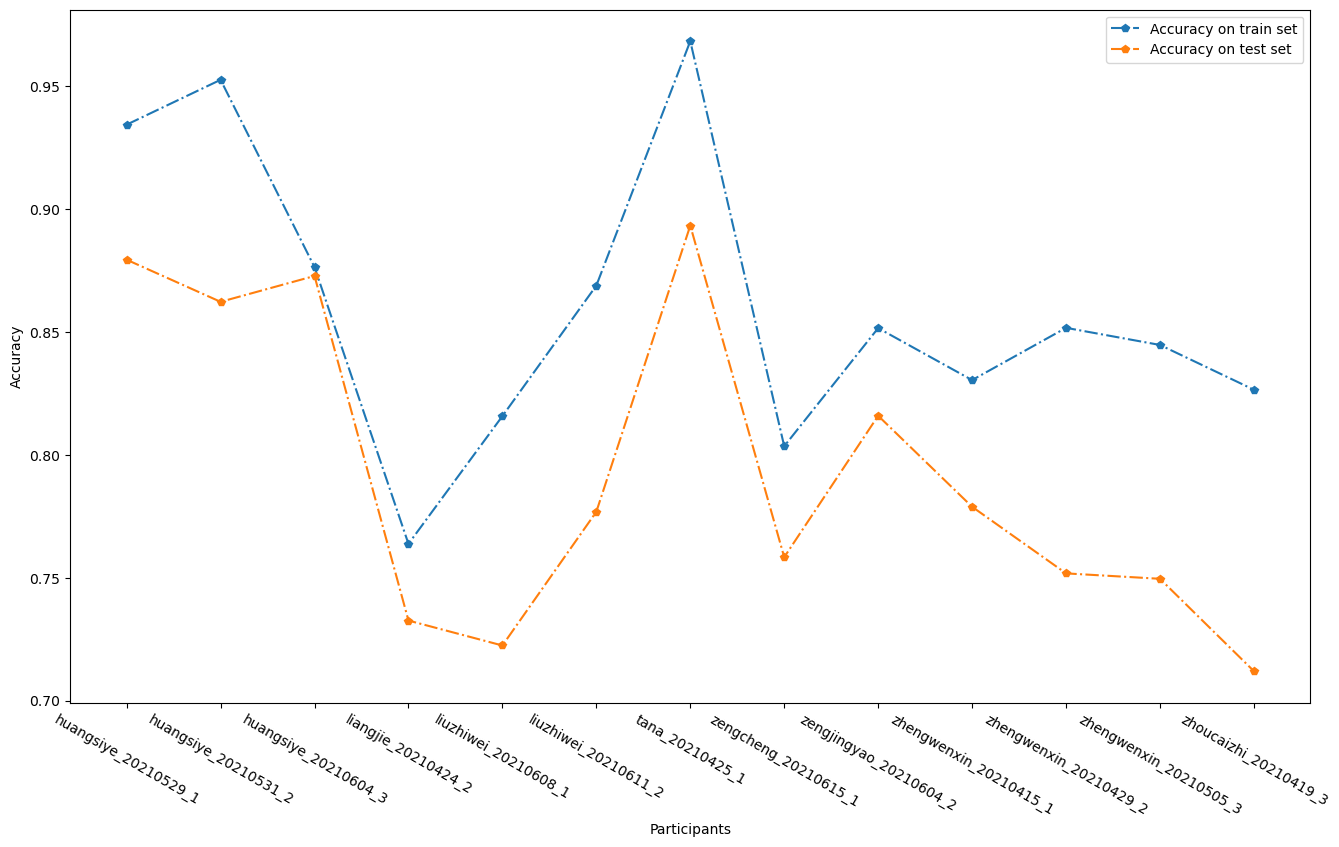

In [9]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_DTC = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = DecisionTreeClassifier(criterion = 'entropy')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_DTC.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [10]:
class MLP(nn.Module):
    def __init__(self, num_classes=2):
        super(MLP, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(310, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        x = self.classifier(x)
        return x

In [11]:
def Validation(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89417
Acc of test set: 0.90069
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91512
Acc of test set: 0.91596
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87059
Acc of test set: 0.87824
Begin to process person liangjie_20210424_2.
Acc of train set: 0.74206
Acc of test set: 0.72069
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75648
Acc of test set: 0.75576
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81733
Acc of test set: 0.80976
Begin to process person tana_20210425_1.
Acc of train set: 0.92803
Acc of test set: 0.92216
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77144
Acc of test set: 0.76285
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83728
Acc of test set: 0.83139
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80599
Acc of test set: 0.80889
Begin to process person zhengwen

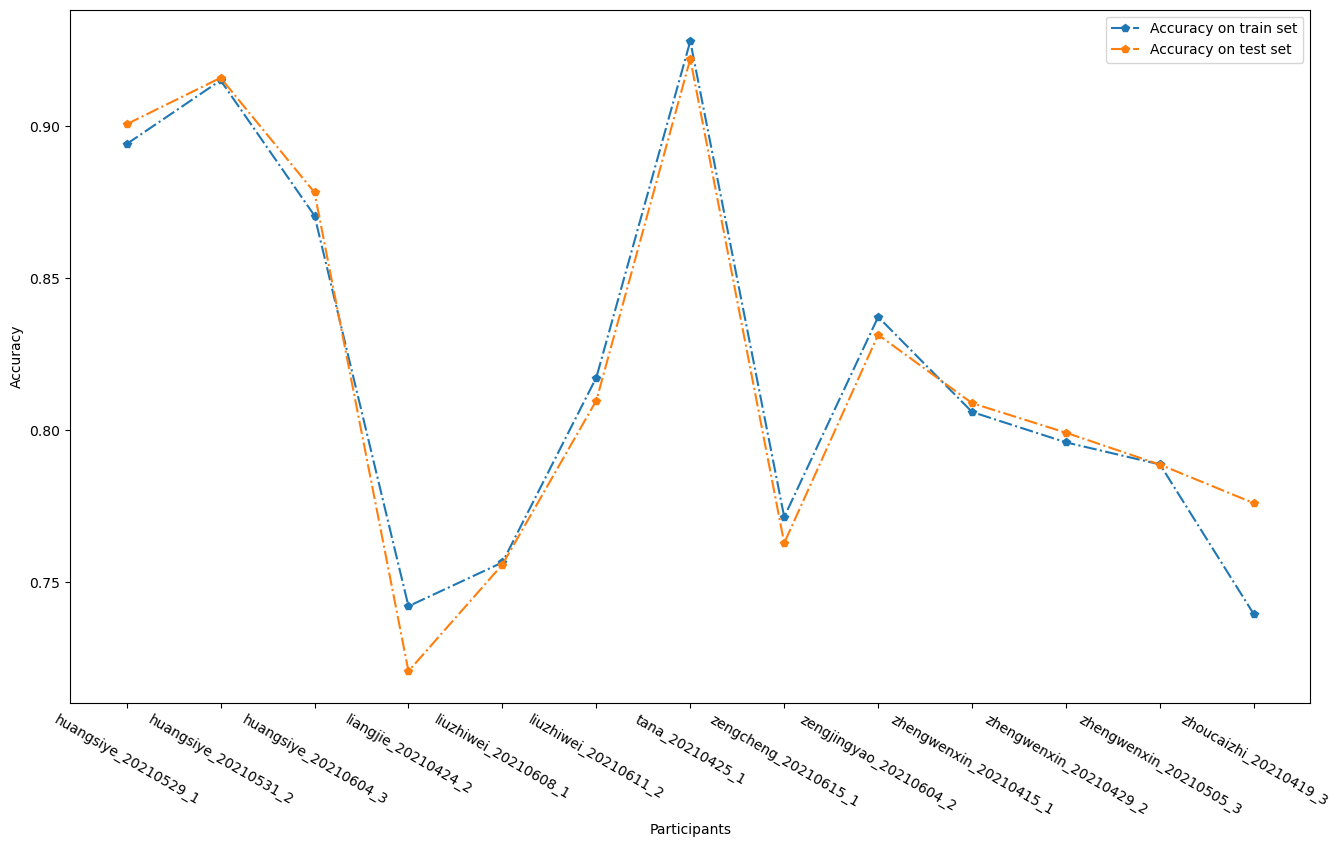

In [12]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_MLP = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = MLP().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_MLP.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [13]:
class CNN(nn.Module):
    def __init__(self, num_classes = 2):
        super(CNN, self).__init__()
        # self.feature_extraction = nn.Sequential(
        #     nn.Conv1d(in_channels = 1, out_channels = 2, kernel_size = 16, padding = 1),
        #     nn.MaxPool1d(kernel_size = 8, stride = 1),
        #     nn.ReLU(),
        #     nn.Conv1d(in_channels = 2, out_channels = 2, kernel_size = 16),
        #     nn.Conv1d(in_channels = 2, out_channels = 4, kernel_size = 16, padding = 1),
        #     nn.ReLU()
        # )  
        # self.classifier = nn.Sequential(
        #     nn.Linear(1048, 2048),
        #     nn.ReLU(),
        #     nn.Dropout(),
        #     nn.Linear(2048, num_classes)
        # )
        self.feature_extraction = nn.Sequential(
            nn.Conv1d(in_channels = 5, out_channels = 8, kernel_size = 4, padding = 1),
            nn.MaxPool1d(kernel_size = 4, stride = 1),
            nn.ReLU(),
            nn.Conv1d(in_channels = 8, out_channels = 16, kernel_size = 4),
            nn.Conv1d(in_channels = 16, out_channels = 32, kernel_size = 4, padding = 1),
            nn.ReLU()
        )  
        self.classifier = nn.Sequential(
            nn.Linear(1728, 2048),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x = self.feature_extraction(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89345
Acc of test set: 0.90113
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91596
Acc of test set: 0.91305
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87252
Acc of test set: 0.87521
Begin to process person liangjie_20210424_2.
Acc of train set: 0.72619
Acc of test set: 0.76191
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75370
Acc of test set: 0.76318
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.82194
Acc of test set: 0.80006
Begin to process person tana_20210425_1.
Acc of train set: 0.92689
Acc of test set: 0.92446
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.76529
Acc of test set: 0.78240
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83576
Acc of test set: 0.82912
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80220
Acc of test set: 0.81900
Begin to process person zhengwen

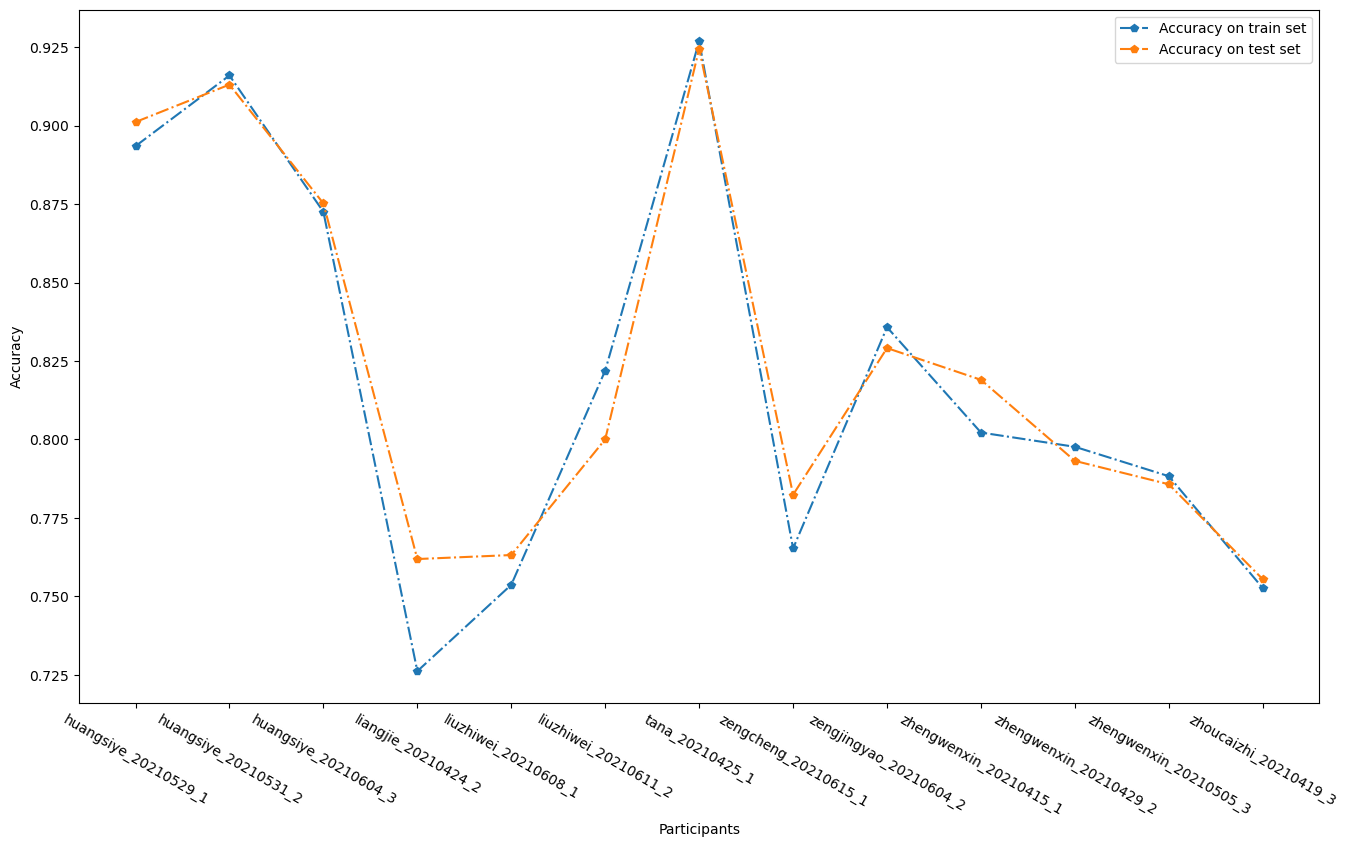

In [14]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_CNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5).permute(0, 2, 1)
        test_data = test_data.reshape(test_data.shape[0], 62, 5).permute(0, 2, 1)
        # train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1).permute(0, 2, 1)
        # test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], 1).permute(0, 2, 1)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = CNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_CNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [15]:
class RNN(nn.Module):
    def __init__(self, hidden_size = 32, num_classes = 2):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size = 5, hidden_size = self.hidden_size, num_layers = 2, batch_first = True, bidirectional = True)
        self.classifier = nn.Sequential(
            nn.Linear(62 * self.hidden_size * 2, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x, _ = self.rnn(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89569
Acc of test set: 0.89812
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91368
Acc of test set: 0.91867
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87522
Acc of test set: 0.86823
Begin to process person liangjie_20210424_2.
Acc of train set: 0.74390
Acc of test set: 0.71749
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75382
Acc of test set: 0.76643
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81668
Acc of test set: 0.81387
Begin to process person tana_20210425_1.
Acc of train set: 0.92484
Acc of test set: 0.92874
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77294
Acc of test set: 0.76258
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83561
Acc of test set: 0.83715
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80967
Acc of test set: 0.80348
Begin to process person zhengwen

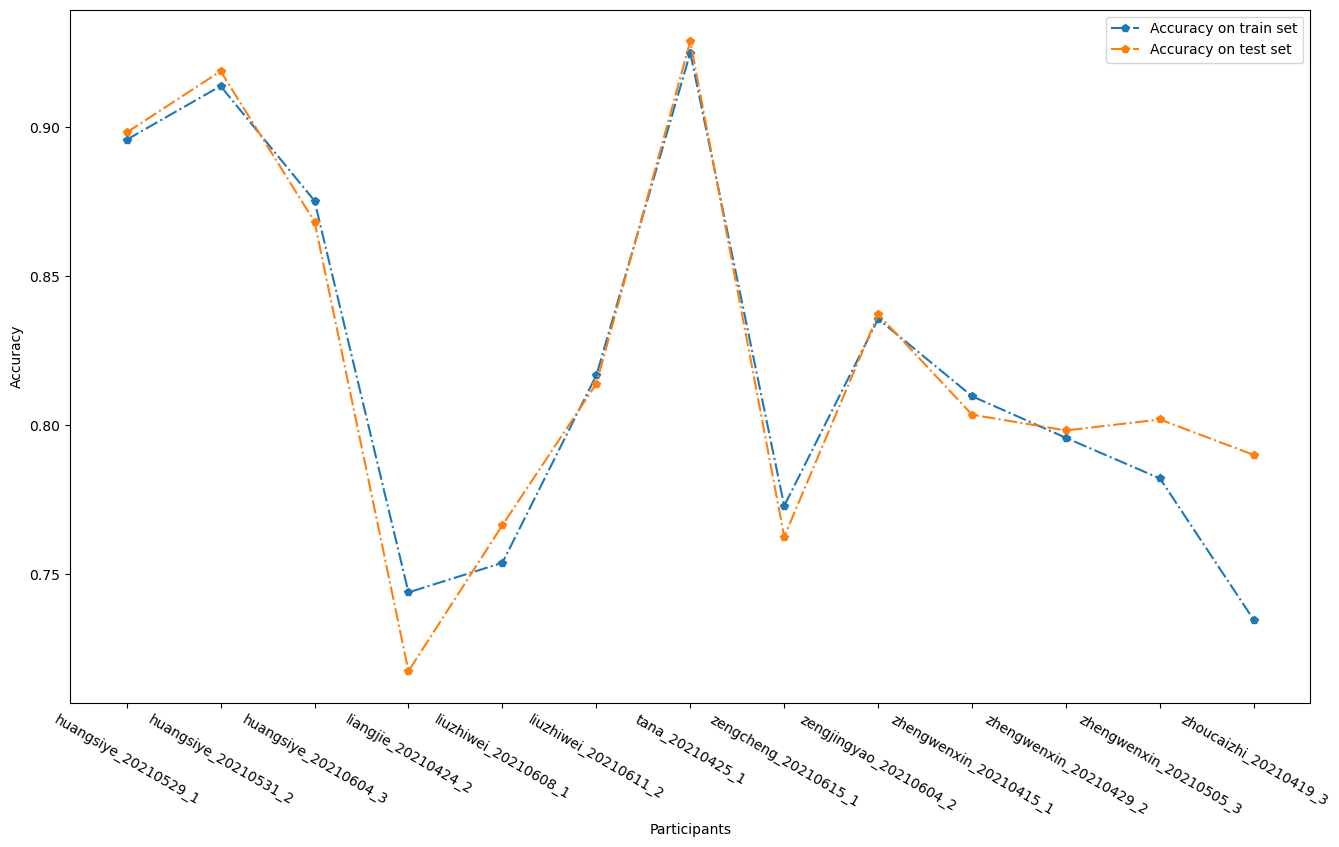

In [16]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_RNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5)
        test_data = test_data.reshape(test_data.shape[0], 62, 5)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = RNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_RNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

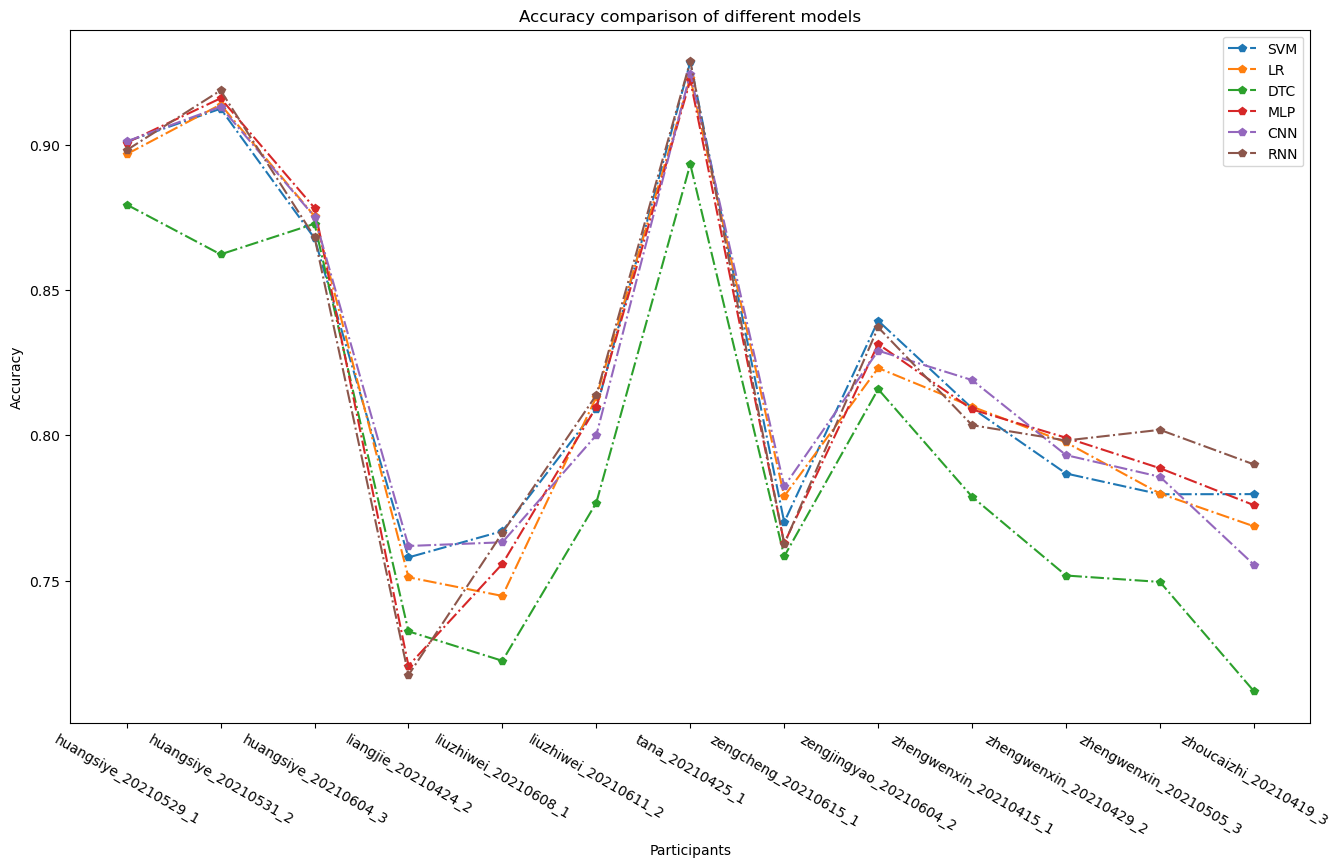

In [17]:
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
plt.title("Accuracy comparison of different models")
x = os.listdir(data_path)
plt.plot(x, acc_tests_SVM, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.legend(['SVM','LR','DTC','MLP','CNN','RNN'])
plt.show()